# Generative Text-to-Image AI Tutorial

The aim of this Notebook is showcasing a Python implementation of generative text-to-image and to-icons AI systems.

This system may be implemented in the storyboard stage of PERCEIVE Co-design WebApp.

In this tutorial we are going to use **HuggingFace's Diffusers Library**

<img src="https://raw.githubusercontent.com/huggingface/diffusers/77aadfee6a891ab9fcfb780f87c693f7a5beeb8e/docs/source/imgs/diffusers_library.jpg">


## HuggingFace *Diffusers*

[Diffusers](https://huggingface.co/docs/diffusers/index) is the go-to library for state-of-the-art pretrained diffusion models for generating images, audio, and even 3D structures of molecules. In this tutorial we are going to call [AutopipelineForTextToImage](https://huggingface.co/docs/diffusers/v0.27.0/en/api/pipelines/auto_pipeline#autopipeline) and other models included in this library. Please make sure the notebook has access to internet (you have to verify your phone number) in the slider on the right (under "Session Options").

Explore the library starting from these hyperlinks

In [1]:
# pip install diffusers accelerate

### AutoPipelineForText2Image

Diffusers provide AutoPipeline for task-oriented pipelines: here we have more flexibility in running inference by enabling the `use_safetensors` to directly load weights. Have a look to an alternative deployment [here](https://colab.research.google.com/drive/1MOcvOhFHKnvwbtLHOZDReNBdqGtGAhx4?usp=sharing)

In [2]:
import torch
from diffusers import AutoPipelineForText2Image

2024-03-15 15:29:40.620937: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 15:29:40.620990: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 15:29:40.622602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


After importing the dependencies it is possible to run the following Python code, where you are calling a **Diffusion Model** (here an open source pre-trained model released by RunwayML) and optimizing the computation by
- assuring that the inference is executed using floating-point 16-bit precision instead of 32-bit;
- converting the pipeline to CUDA to ensure that the inference runs on the GPU: please use <u>GPU T4 x2 Accelerator</u>

In [3]:
pipe_stab_dif = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe_stab_dif = pipe_stab_dif.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You are defining a new function which can be called in the future to create an image, as shown here. We have addedd `pipe` as first parameter to avoid defining new functions in the future (see later when trying to create UI Icons)

  0%|          | 0/50 [00:00<?, ?it/s]

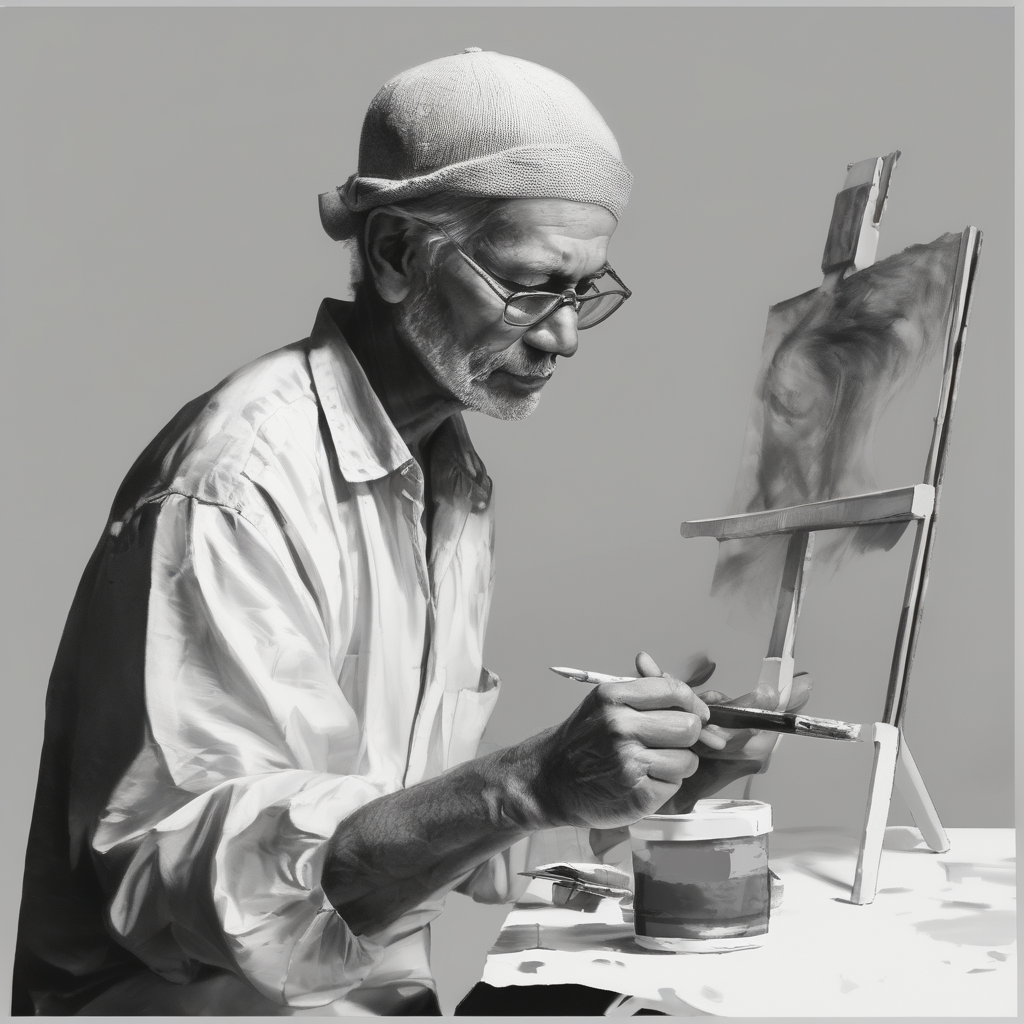

In [8]:
def text_to_image(pipe, prompt):
  image = pipe(prompt).images[0]
  return image

current_image = text_to_image(pipe_stab_dif, "A person painting, transparent background, black and white")
current_image

The output of this algortihm is a `Pillow.Image` object (see [documentation](https://pillow.readthedocs.io/en/stable/reference/Image.html))

In [9]:
print(type(current_image))

<class 'PIL.Image.Image'>


## Icons Generator

StableDiffusion XL is by far one of the best performing models for image generations: but what if you want to create icons for a web-app? The outputs of the previous pipeline are not adeguate for this task. A possible alternative for this is this specific [model](https://huggingface.co/justinwlinx/ui-icon) for Icon Generation, included in the `diffusers` package.

In [10]:
from diffusers import DiffusionPipeline

pipe_ui_icon1 = DiffusionPipeline.from_pretrained("justinwlinx/ui-icon")
pipe_ui_icon1 = pipe_ui_icon1.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Create a new function for the new pipeline. Note that the generation of content with this model may be slower than the previous one ... be patient!

  0%|          | 0/50 [00:00<?, ?it/s]

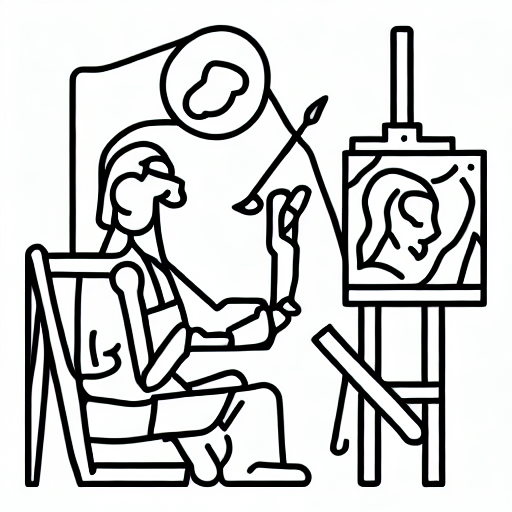

In [12]:
current_icon = text_to_image(pipe_ui_icon1, "A person painting")
current_icon

### Save

You can add a function to save these images:

In [16]:
def save_tmp(img):
    path = "{0}.png".format(img)
    img.save(path)

In [17]:
save_tmp(current_image)

Alternative with `pipe_ui_2 = DiffusionPipeline.from_pretrained("kopyl/ui-icons-256")`

**To do next week**: please note tht you need to clean cuda